# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [3]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!

# Create a new dataframe from your CSV

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df=pd.read_csv('dairy_dataset.csv')

In [13]:
# Print out any information you need to understand your dataframe
df.shape
print(df.describe)
print(df.head(10))

<bound method NDFrame.describe of            Location  Total Land Area (acres)  Number of Cows Farm Size  \
0         Telangana                   310.84              96    Medium   
1     Uttar Pradesh                    19.19              44     Large   
2        Tamil Nadu                   581.69              24    Medium   
3         Telangana                   908.00              89     Small   
4       Maharashtra                   861.95              21    Medium   
...             ...                      ...             ...       ...   
4320          Delhi                   748.71              89    Medium   
4321      Jharkhand                   385.91              29     Large   
4322     Chandigarh                   311.54              65     Small   
4323    Maharashtra                   890.55              90     Small   
4324      Rajasthan                   492.86              58     Large   

            Date  Product ID Product Name                 Brand  \
0     2022

Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<Axes: >

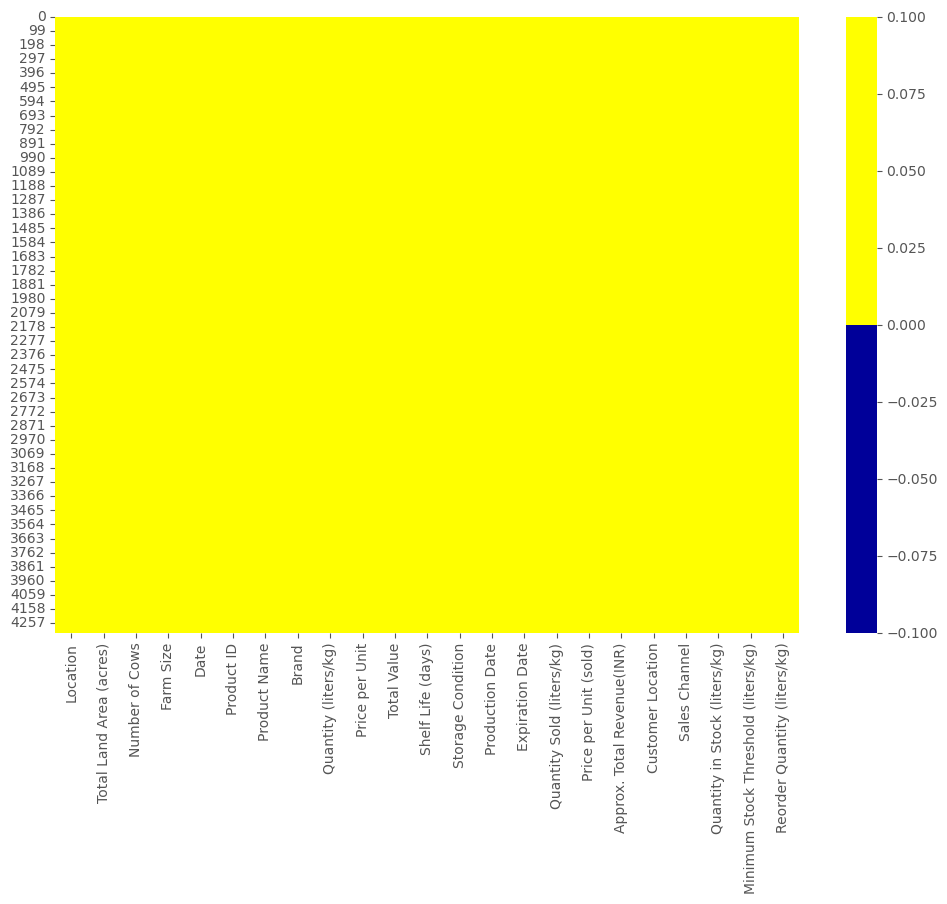

In [8]:
# Plot a heatmap of any missing data
cols = df.columns[:100] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [9]:
# Try out a missing data percentage list! 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Location - 0%
Total Land Area (acres) - 0%
Number of Cows - 0%
Farm Size - 0%
Date - 0%
Product ID - 0%
Product Name - 0%
Brand - 0%
Quantity (liters/kg) - 0%
Price per Unit - 0%
Total Value - 0%
Shelf Life (days) - 0%
Storage Condition - 0%
Production Date - 0%
Expiration Date - 0%
Quantity Sold (liters/kg) - 0%
Price per Unit (sold) - 0%
Approx. Total Revenue(INR) - 0%
Customer Location - 0%
Sales Channel - 0%
Quantity in Stock (liters/kg) - 0%
Minimum Stock Threshold (liters/kg) - 0%
Reorder Quantity (liters/kg) - 0%


<Axes: xlabel='index'>

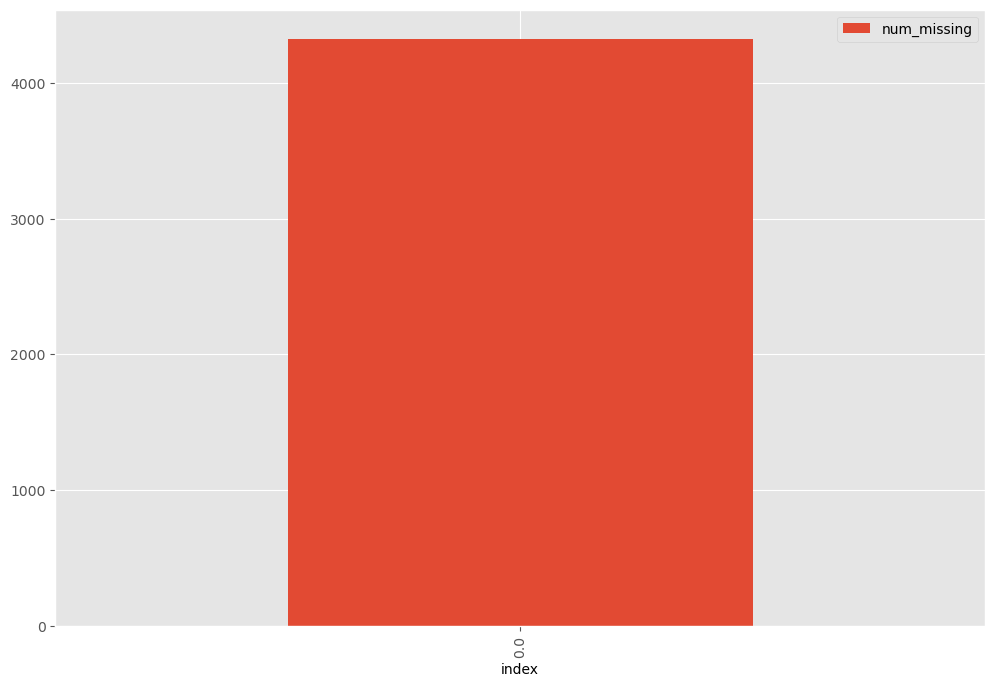

In [11]:
# Plot a missing data histogram
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

I accidentally picked a fairly complete dataset from kaggle. The missing data percentage list was by far the most helpful for the size of the set. It definitely could use some other kinds of cleanup though.

In [12]:
# Handle any missing data in your dataframe.



## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

array([[<Axes: title={'center': 'Total Land Area (acres)'}>,
        <Axes: title={'center': 'Number of Cows'}>,
        <Axes: title={'center': 'Product ID'}>,
        <Axes: title={'center': 'Quantity (liters/kg)'}>],
       [<Axes: title={'center': 'Price per Unit'}>,
        <Axes: title={'center': 'Total Value'}>,
        <Axes: title={'center': 'Shelf Life (days)'}>,
        <Axes: title={'center': 'Quantity Sold (liters/kg)'}>],
       [<Axes: title={'center': 'Price per Unit (sold)'}>,
        <Axes: title={'center': 'Approx. Total Revenue(INR)'}>,
        <Axes: title={'center': 'Quantity in Stock (liters/kg)'}>,
        <Axes: title={'center': 'Minimum Stock Threshold (liters/kg)'}>],
       [<Axes: title={'center': 'Reorder Quantity (liters/kg)'}>,
        <Axes: title={'center': 'num_missing'}>, <Axes: >, <Axes: >]],
      dtype=object)

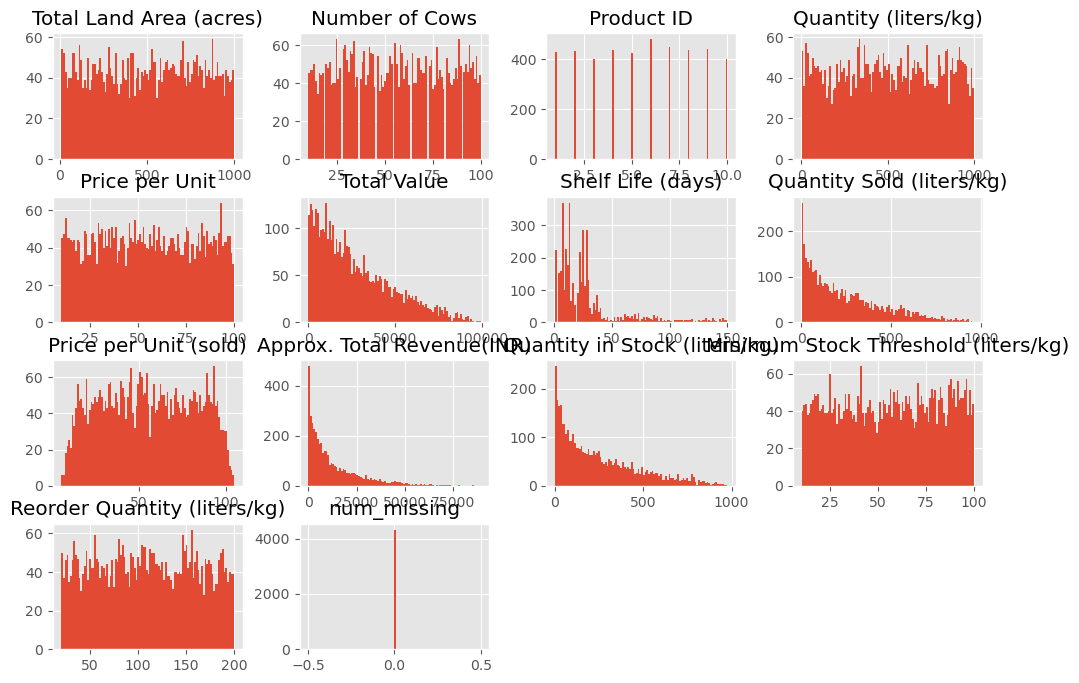

In [17]:
# Plot a histogram to see if there are any outliers.
df.hist(bins=100)

<Axes: >

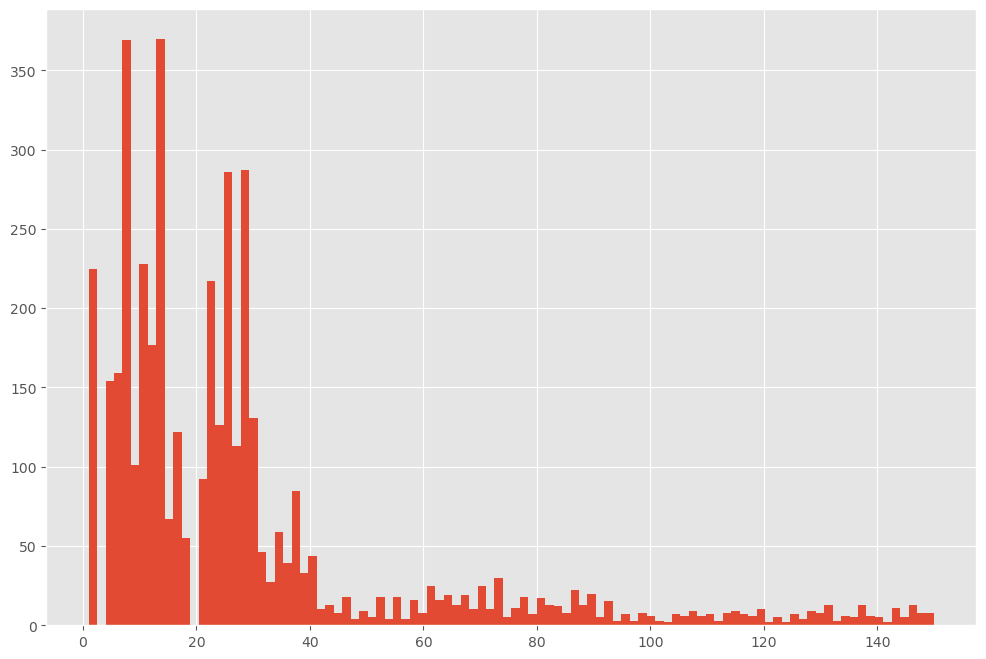

In [24]:
df["Shelf Life (days)"].hist(bins=100)

In [23]:
# Use the describe() method
df['Shelf Life (days)'].describe()

count    4325.000000
mean       29.127630
std        30.272114
min         1.000000
25%        10.000000
50%        22.000000
75%        30.000000
max       150.000000
Name: Shelf Life (days), dtype: float64

<Axes: >

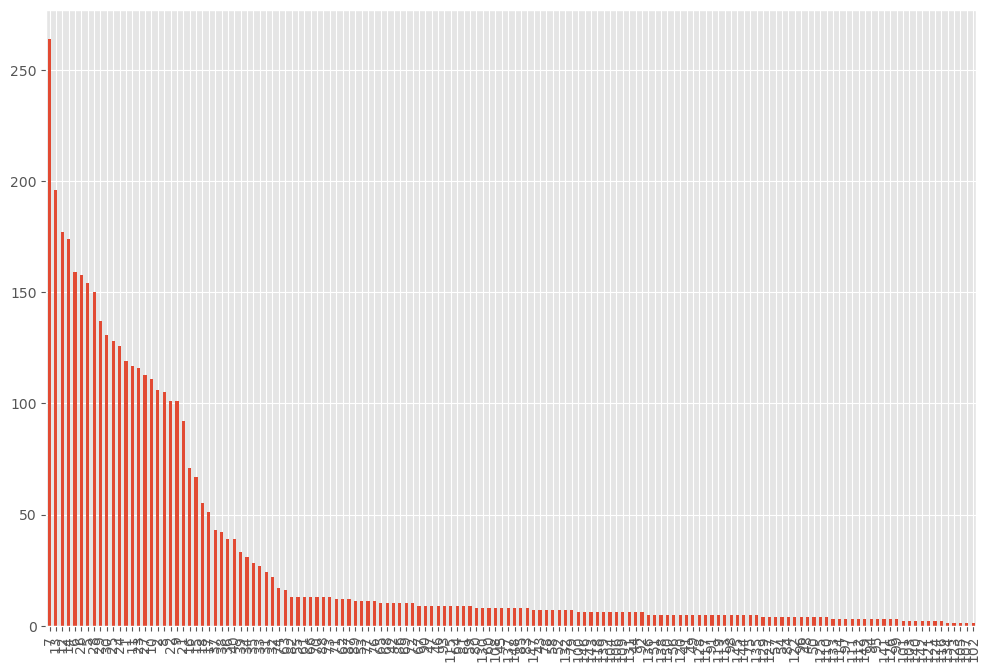

In [26]:
# Plot a bar chart
df['Shelf Life (days)'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [10]:
# Handle any outliers in your dataframe

The only area with wide varieties that could skew final metrics is the shelf life in days column. I was planning to remove this from the analysis. 


## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [27]:
# Look for any irrelevant data in the dataframe. How will you handle it?
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

num_missing: 100.00000%
0.0    4325
Name: num_missing, dtype: int64



In [39]:
#I will remove the columns with no information
df_dedupped = df.drop('num_missing', axis=1)
df_dedupped.head(5)

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [30]:
df.head(5)

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),num_missing
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03,0.0
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10,0.0
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83,0.0
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68,0.0
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40,0.0


In [33]:
# Look for duplicates. How will you handle any duplicates?
key = ['Location', 'Product Name', 'Quantity (liters/kg)', 'Expiration Date']

df.fillna(-999).groupby(key)['Location'].count().sort_values(ascending=False).head(20)

Location     Product Name  Quantity (liters/kg)  Expiration Date
Bihar        Butter        28.42                 2019-10-17         1
Maharashtra  Cheese        581.68                2022-09-16         1
             Buttermilk    980.37                2021-07-06         1
             Cheese        11.94                 2020-05-28         1
                           32.72                 2023-01-11         1
                           151.86                2020-10-12         1
                           233.78                2022-12-20         1
                           247.53                2023-02-25         1
                           253.04                2019-03-30         1
                           295.64                2021-12-22         1
                           360.65                2020-07-03         1
                           384.21                2022-11-22         1
                           458.08                2019-03-05         1
                         

In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

In [28]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

num_missing: 100.00000%
0.0    4325
Name: num_missing, dtype: int64



## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [35]:
# Try to convert all the strings in a column to lower or upper case. 

df['Brand'].value_counts(dropna=False)


Amul                    1053
Mother Dairy            1010
Raj                      685
Sudha                    648
Dodla Dairy              222
Palle2patnam             211
Dynamix Dairies          106
Warana                   104
Parag Milk Foods         102
Passion Cheese            96
Britannia Industries      88
Name: Brand, dtype: int64